In [1]:
# Import model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("used_cars.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [4]:
# remove string noise
def change_value(value,noise:str):
    if isinstance(value,int) or isinstance(value,float) :
        return value
    
    if value == "" :
        return np.nan
    
    try :
        return float(str(value).replace(noise,""))
    except :
        return np.nan

In [5]:
# convert string values to numberic

data.drop("torque",axis=1,inplace=True)
data.drop("name",axis=1,inplace=True)


data["mileage"] = data["mileage"].apply(lambda value : change_value(value," kmpl"))
data["engine"] = data["engine"].apply(lambda value : change_value(value," CC"))
data["max_power"] = data["max_power"].apply(lambda value : change_value(value," bhp"))

data["fuel"] = LabelEncoder().fit_transform(data["fuel"])
data["seller_type"] = LabelEncoder().fit_transform(data["seller_type"])
data["transmission"] = LabelEncoder().fit_transform(data["transmission"])
data["owner"] = LabelEncoder().fit_transform(data["owner"])

data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int32  
 4   seller_type    8128 non-null   int32  
 5   transmission   8128 non-null   int32  
 6   owner          8128 non-null   int32  
 7   mileage        7819 non-null   float64
 8   engine         7907 non-null   float64
 9   max_power      7912 non-null   float64
 10  seats          7907 non-null   float64
dtypes: float64(4), int32(4), int64(3)
memory usage: 571.6 KB


In [7]:
# fill nans
data = data.fillna(value={
    "mileage" : data["mileage"].mean(),
    "engine" : data["engine"].mean(),
    "max_power" : data["max_power"].mean(),
    "seats" : data["seats"].mean(),
    
})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   int32  
 4   seller_type    8128 non-null   int32  
 5   transmission   8128 non-null   int32  
 6   owner          8128 non-null   int32  
 7   mileage        8128 non-null   float64
 8   engine         8128 non-null   float64
 9   max_power      8128 non-null   float64
 10  seats          8128 non-null   float64
dtypes: float64(4), int32(4), int64(3)
memory usage: 571.6 KB


# ploting

([], [])

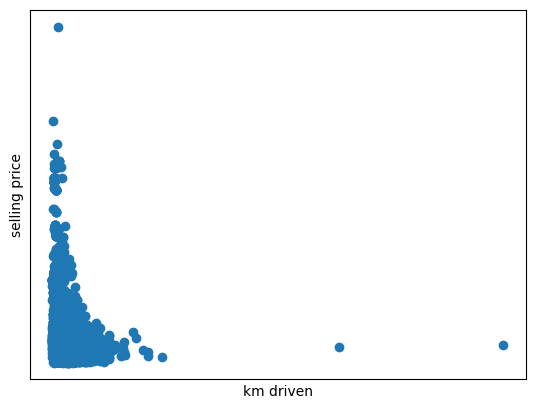

In [8]:
plt.scatter(data["km_driven"],data["selling_price"])
plt.xlabel("km driven")
plt.ylabel("selling price")
plt.xticks([])
plt.yticks([])

(array([4.820e+03, 2.498e+03, 2.900e+02, 1.620e+02, 5.900e+01, 7.000e+01,
        5.500e+01, 4.400e+01, 1.100e+01, 2.000e+00, 1.010e+02, 1.200e+01,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   29999.  ,   528499.05,  1026999.1 ,  1525499.15,  2023999.2 ,
         2522499.25,  3020999.3 ,  3519499.35,  4017999.4 ,  4516499.45,
         5014999.5 ,  5513499.55,  6011999.6 ,  6510499.65,  7008999.7 ,
         7507499.75,  8005999.8 ,  8504499.85,  9002999.9 ,  9501499.95,
        10000000.  ]),
 <BarContainer object of 20 artists>)

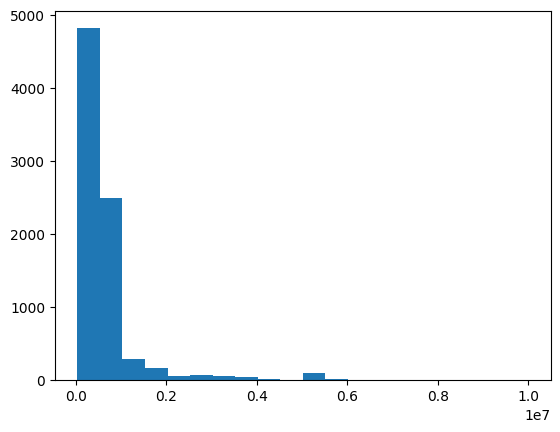

In [9]:
# hist of `selling price` with 20 bins
plt.hist(data["selling_price"],bins=20)

# ML

* # تک متغیره

In [37]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge,Lasso,ElasticNet


from sklearn.metrics import r2_score,mean_squared_error

In [20]:
x = data["km_driven"].values.reshape(-1,1)
y = data["selling_price"].values

print("Split data ...")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("Make data scale ...")
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale  = sc.transform(x_test)

print("Defind and fit model ...")
model = LinearRegression()
model.fit(x_train_scale,y_train)

print("Validation :\n\n")
y_pre = model.predict(x_test)

print(f"R2  : {r2_score(y_test,y_pre)}")
print(f"MSE : {mean_squared_error(y_test,y_pre)}")

Split data ...
Make data scale ...
Defind and fit model ...
Validation :


R2  : -329049917.67147493
MSE : 2.1568710180557396e+20


* # چند متغیره

In [30]:
custom_column_list = list(data.columns)
custom_column_list.remove("selling_price")

x = data[custom_column_list].values
y = data["selling_price"].values

print("Split data ...")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("Make data scale ...")
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale  = sc.transform(x_test)

print("Defind and fit model ...")
model = LinearRegression()
model.fit(x_train_scale,y_train)

print("Validation :\n\n")
y_pre = model.predict(x_test)

print(f"R2  : {r2_score(y_test,y_pre)}")
print(f"MSE : {mean_squared_error(y_test,y_pre)}")

Split data ...
Make data scale ...
Defind and fit model ...
Validation :


R2  : -32849110.472226765
MSE : 2.153208145116319e+19


* # چند جمله ای

In [36]:
custom_column_list = list(data.columns)
custom_column_list.remove("selling_price")

x = data[custom_column_list].values
y = data["selling_price"].values

print("Split data ...")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print("Make data polynomial ...")
pf = PolynomialFeatures(include_bias=False)
x_train = pf.fit_transform(x_train)
x_test  = pf.fit_transform(x_test)

print("Make data scale ...")
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale  = sc.transform(x_test)

print("Defind and fit model ...")
model = LinearRegression()
model.fit(x_train_scale,y_train)

print("Validation :\n\n")
y_pre = model.predict(x_test)

print(f"R2  : {r2_score(y_test,y_pre)}")
print(f"MSE : {mean_squared_error(y_test,y_pre)}")

Split data ...
Make data polynomial ...
Make data scale ...
Defind and fit model ...
Validation :


R2  : -2.2713621770622671e+18
MSE : 1.4888425655879934e+30


* # Ridge

In [47]:
# Ridge

custom_column_list = list(data.columns)
custom_column_list.remove("selling_price")

x = data[custom_column_list].values
y = data["selling_price"].values


print("Split data ...")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


print("Make data scale ...")
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale  = sc.transform(x_test)


print("Defind and fit model ...")
model = Ridge()
gs = GridSearchCV(model,{
    "alpha":[0.001,0.05,0.1,0.5,1,10,50,100,150,200]
},cv=5)

gs.fit(x_train_scale,y_train)


print("Validation :\n")
y_pre = gs.predict(x_test_scale)

print(f"\tR2         : {r2_score(y_test,y_pre)}")
print(f"\tMSE        : {mean_squared_error(y_test,y_pre)}")
print(f"\tBest param : {gs.best_params_}")

Split data ...
Make data scale ...
Defind and fit model ...
Validation :

	R2         : 0.6862514763856573
	MSE        : 205657275429.13882
	Best param : {'alpha': 50}


* # Lasso

In [48]:
# Lasso

custom_column_list = list(data.columns)
custom_column_list.remove("selling_price")

x = data[custom_column_list].values
y = data["selling_price"].values


print("Split data ...")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


print("Make data scale ...")
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale  = sc.transform(x_test)


print("Defind and fit model ...")
model = Lasso()
gs = GridSearchCV(model,{
    "alpha":[0.001,0.05,0.1,0.5,1,10,50,100,150,200,500,1000,2000,5000]
},cv=5)

gs.fit(x_train_scale,y_train)


print("Validation :\n")
y_pre = gs.predict(x_test_scale)

print(f"\tR2         : {r2_score(y_test,y_pre)}")
print(f"\tMSE        : {mean_squared_error(y_test,y_pre)}")
print(f"\tBest param : {gs.best_params_}")

Split data ...
Make data scale ...
Defind and fit model ...
Validation :

	R2         : 0.685571189939777
	MSE        : 206103192609.43158
	Best param : {'alpha': 5000}


* # ElasticNet

In [49]:
# ElasticNet

custom_column_list = list(data.columns)
custom_column_list.remove("selling_price")

x = data[custom_column_list].values
y = data["selling_price"].values


print("Split data ...")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


print("Make data scale ...")
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale  = sc.transform(x_test)


print("Defind and fit model ...")
model = ElasticNet()
gs = GridSearchCV(model,{
    "alpha":[0.001,0.05,0.1,0.5,1,10,50,100,150,200,500,1000,2000,5000],
    "l1_ratio" : [0.001,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
},cv=5)

gs.fit(x_train_scale,y_train)


print("Validation :\n")
y_pre = gs.predict(x_test_scale)

print(f"\tR2         : {r2_score(y_test,y_pre)}")
print(f"\tMSE        : {mean_squared_error(y_test,y_pre)}")
print(f"\tBest param : {gs.best_params_}")

Split data ...
Make data scale ...
Defind and fit model ...
Validation :

	R2         : 0.6862001368159321
	MSE        : 205690927718.27084
	Best param : {'alpha': 0.1, 'l1_ratio': 0.9}


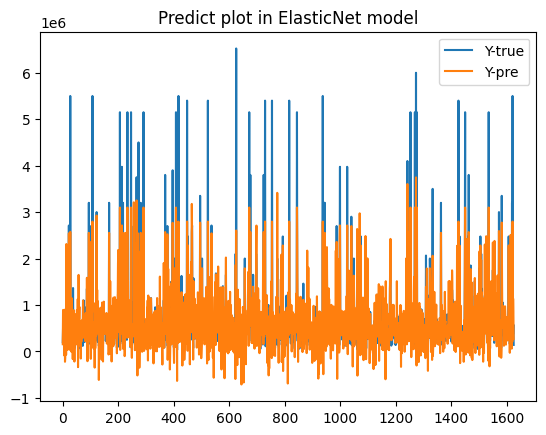

In [54]:
# plot of ElasticNet model for prediction x_test
plt.title("Predict plot in ElasticNet model")
plt.plot(y_test,label="Y-true")
plt.plot(y_pre,label="Y-pre")

plt.legend()